In [13]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from pathlib import Path

filepath = Path('/home/kuries/Desktop/sem/sem7/dip_lab/dataset/lena')

image = cv2.imread(str(filepath / 'Lena.png'))

b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [32]:
def GetBilinearPixel(imArr, posX, posY):
	out = []
 
	#Get integer and fractional parts of numbers
	modXi = int(posX)
	modYi = int(posY)
	modXf = posX - modXi
	modYf = posY - modYi
	modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
	modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)
 
	#Get pixels in four corners
	for chan in range(imArr.shape[2]):
		bl = imArr[modYi, modXi, chan]
		br = imArr[modYi, modXiPlusOneLim, chan]
		tl = imArr[modYiPlusOneLim, modXi, chan]
		tr = imArr[modYiPlusOneLim, modXiPlusOneLim, chan]
 
		#Calculate interpolation
		b = modXf * br + (1. - modXf) * bl
		t = modXf * tr + (1. - modXf) * tl
		pxf = modYf * t + (1. - modYf) * b
		out.append(int(pxf+0.5))
 
	return out

In [31]:
def biLinearInterpolation(scaling):
    enlargedShape = list(map(int, [image.shape[0]*scaling, image.shape[1]*scaling, image.shape[2]]))
    scaledImg = np.empty(enlargedShape, dtype=np.uint8)

    rowScale = float(image.shape[0]) / float(scaledImg.shape[0])
    colScale = float(image.shape[1]) / float(scaledImg.shape[1])

    for r in range(scaledImg.shape[0]):
            for c in range(scaledImg.shape[1]):
                org_row = r * rowScale #Find position in original image
                org_col = c * colScale
                scaledImg[r, c] = GetBilinearPixel(image, org_col, org_row)

    return scaledImg

In [37]:
def nearestNeighbor(scaling):
    enlargedShape = list(map(int, [image.shape[0]*scaling, image.shape[1]*scaling, image.shape[2]]))
    scaledImg = np.empty(enlargedShape, dtype=np.uint8)

    rowScale = float(image.shape[0]) / float(scaledImg.shape[0])
    colScale = float(image.shape[1]) / float(scaledImg.shape[1])

    for r in range(scaledImg.shape[0]):
            for c in range(scaledImg.shape[1]):
                for color in range(scaledImg.shape[2]):
                    org_row = int(r * rowScale) #Find position in original image
                    org_col = int(c * colScale)
                    scaledImg[r, c] = image[org_row, org_col]

    return scaledImg

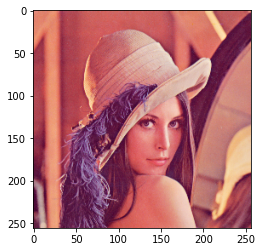

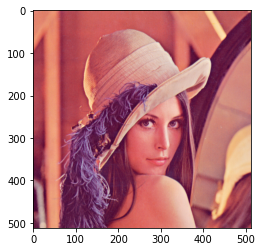

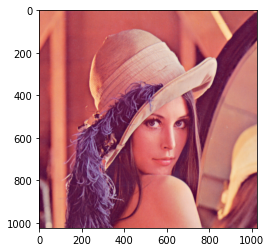

In [33]:
img0_dot_5, img1, img2 = list(map(lambda x: biLinearInterpolation(x), [0.5, 1, 2]))

plt.imshow(img0_dot_5)
plt.show()

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

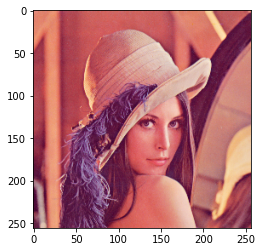

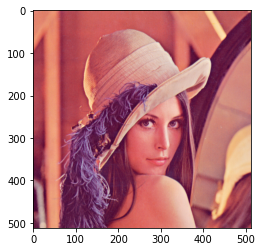

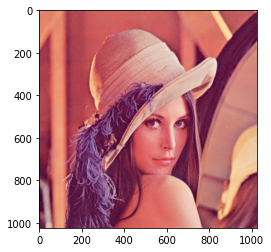

In [38]:
nnimg0_dot_5, nnimg1, nnimg2 = list(map(lambda x: nearestNeighbor(x), [0.5, 1, 2]))

plt.imshow(nnimg0_dot_5)
plt.show()

plt.imshow(nnimg1)
plt.show()

plt.imshow(nnimg2)
plt.show()

In [41]:
cv2.imshow("lena", nnimg0_dot_5)
cv2.waitKey(0)
cv2.destroyAllWindows()